## **US county-level sociodemographic and health resource data (2018-2019).**
### Sociodemographic and health resource data have been collected by county in the United States and we want to find out if there is any relationship between health resources and sociodemographic data.

### To do this, you need to set a target variable (health-related) to conduct the analysis.

In [1]:
# Import the libraries
import pandas as pd

### **Step 1:** Loading the dataset

In [2]:
# Load the dataset from this link: https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv
resource_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
resource_data

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


### **Step 2:** Full EDA

In [3]:
# Data info
resource_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [4]:
# Data columns
resource_data.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [5]:
# Duplicate values
resource_data.duplicated().sum()

0

In [6]:
# Unique values
resource_data.nunique()

fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64

In [7]:
# Null values
print(resource_data.isnull().sum())
print('\n\n')
print(resource_data.isna().sum())

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64



fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64


In [8]:
# categorical values
resource_data.select_dtypes(include=['object']).columns

Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')

In [9]:
# numerical values
resource_data.select_dtypes(include=['int64','float64']).columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=106)

Information about the dataset:
- The dataset contains 108 columns which makes it difficult to explore all the columns. Therefore, we will explore the dataset by dividing it into 3 parts:
    - Part 1: Sociodemographic data
    - Part 2: Health resource data
    - Part 3: Target variable

#### **Part 1: Sociodemographic data**

In [10]:
# Select the socialdemographic columns
sociodemographic = resource_data.iloc[:, 0:60]
sociodemographic

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,30.9,43.9,36.7,34382,31157,37607,8373,7940,433,5.2
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,21.8,27.8,26.3,46064,41283,50845,8661,8317,344,4.0
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,13.2,18.0,15.5,50412,46157,54667,25006,24128,878,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,8.4,10.0,8.5,73315,67141,79489,21150,20254,896,4.2
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,6.3,6.7,5.9,99087,88142,110032,15340,14876,464,3.0
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,10.0,12.1,10.6,63401,56812,69990,8931,8541,390,4.4
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,11.9,16.1,14.5,55190,49263,61117,4058,3886,172,4.2


In [11]:
sociodemographic.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop', '40-49',
       '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop',
       '60-69', '60-69 y/o % of total pop', '70-79',
       '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop',
       'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone',
       'Native American/American Indian-alone pop', '% NA/AI-alone',
       'Asian-alone pop', '% Asian-alone',
       'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone',
       'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018',
       'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018',
       'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018',
       'R_NET_MIG_2018', 'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       '

In [12]:
# Drop the columns that are not needed
sociodemographic.drop(
    [
        '0-9','0-9 y/o % of total pop','19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49',
        '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop',
        'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone',
        'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018',
        'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18',
        "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18"
    ]
    , axis=1, inplace=True)
sociodemographic

,fips,TOT_POP,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,...,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018
0,1001,55601,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,...,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6
1,1003,218022,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,...,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6
2,1005,24881,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,...,30.9,43.9,36.7,34382,31157,37607,8373,7940,433,5.2
3,1007,22400,11.1,11.4,-0.3,0.4,-7.0,-6.6,2650,7471,...,21.8,27.8,26.3,46064,41283,50845,8661,8317,344,4.0
4,1009,57840,11.8,11.4,0.3,0.1,-0.2,0.0,7861,13489,...,13.2,18.0,15.5,50412,46157,54667,25006,24128,878,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,12.6,7.0,5.6,1.4,-18.5,-17.2,2549,9433,...,8.4,10.0,8.5,73315,67141,79489,21150,20254,896,4.2
3136,56039,23081,9.9,3.2,6.7,1.6,-16.2,-14.5,958,2272,...,6.3,6.7,5.9,99087,88142,110032,15340,14876,464,3.0
3137,56041,20299,13.5,7.2,6.3,0.0,-14.0,-14.1,934,5176,...,10.0,12.1,10.6,63401,56812,69990,8931,8541,390,4.4
3138,56043,7885,9.3,10.7,-1.4,-0.6,-16.6,-17.2,590,1717,...,11.9,16.1,14.5,55190,49263,61117,4058,3886,172,4.2


In [13]:
# Dataframe info
sociodemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   fips                                        3140 non-null   int64  
 1   TOT_POP                                     3140 non-null   int64  
 2   R_birth_2018                                3140 non-null   float64
 3   R_death_2018                                3140 non-null   float64
 4   R_NATURAL_INC_2018                          3140 non-null   float64
 5   R_INTERNATIONAL_MIG_2018                    3140 non-null   float64
 6   R_DOMESTIC_MIG_2018                         3140 non-null   float64
 7   R_NET_MIG_2018                              3140 non-null   float64
 8   Less than a high school diploma 2014-18     3140 non-null   int64  
 9   High school diploma only 2014-18            3140 non-null   int64  
 10  Some college

In [15]:
# Dataframe null values
sociodemographic.isnull().sum()

fips                                          0
TOT_POP                                       0
R_birth_2018                                  0
R_death_2018                                  0
R_NATURAL_INC_2018                            0
R_INTERNATIONAL_MIG_2018                      0
R_DOMESTIC_MIG_2018                           0
R_NET_MIG_2018                                0
Less than a high school diploma 2014-18       0
High school diploma only 2014-18              0
Some college or associate's degree 2014-18    0
Bachelor's degree or higher 2014-18           0
POVALL_2018                                   0
PCTPOVALL_2018                                0
PCTPOV017_2018                                0
PCTPOV517_2018                                0
MEDHHINC_2018                                 0
CI90LBINC_2018                                0
CI90UBINC_2018                                0
Civilian_labor_force_2018                     0
Employed_2018                           

There is not missing value in the sociodemographic data.

array([[<Axes: title={'center': 'fips'}>,
        <Axes: title={'center': 'TOT_POP'}>,
        <Axes: title={'center': 'R_birth_2018'}>,
        <Axes: title={'center': 'R_death_2018'}>,
        <Axes: title={'center': 'R_NATURAL_INC_2018'}>],
       [<Axes: title={'center': 'R_INTERNATIONAL_MIG_2018'}>,
        <Axes: title={'center': 'R_DOMESTIC_MIG_2018'}>,
        <Axes: title={'center': 'R_NET_MIG_2018'}>,
        <Axes: title={'center': 'Less than a high school diploma 2014-18'}>,
        <Axes: title={'center': 'High school diploma only 2014-18'}>],
       [<Axes: title={'center': "Some college or associate's degree 2014-18"}>,
        <Axes: title={'center': "Bachelor's degree or higher 2014-18"}>,
        <Axes: title={'center': 'POVALL_2018'}>,
        <Axes: title={'center': 'PCTPOVALL_2018'}>,
        <Axes: title={'center': 'PCTPOV017_2018'}>],
       [<Axes: title={'center': 'PCTPOV517_2018'}>,
        <Axes: title={'center': 'MEDHHINC_2018'}>,
        <Axes: title={'cent

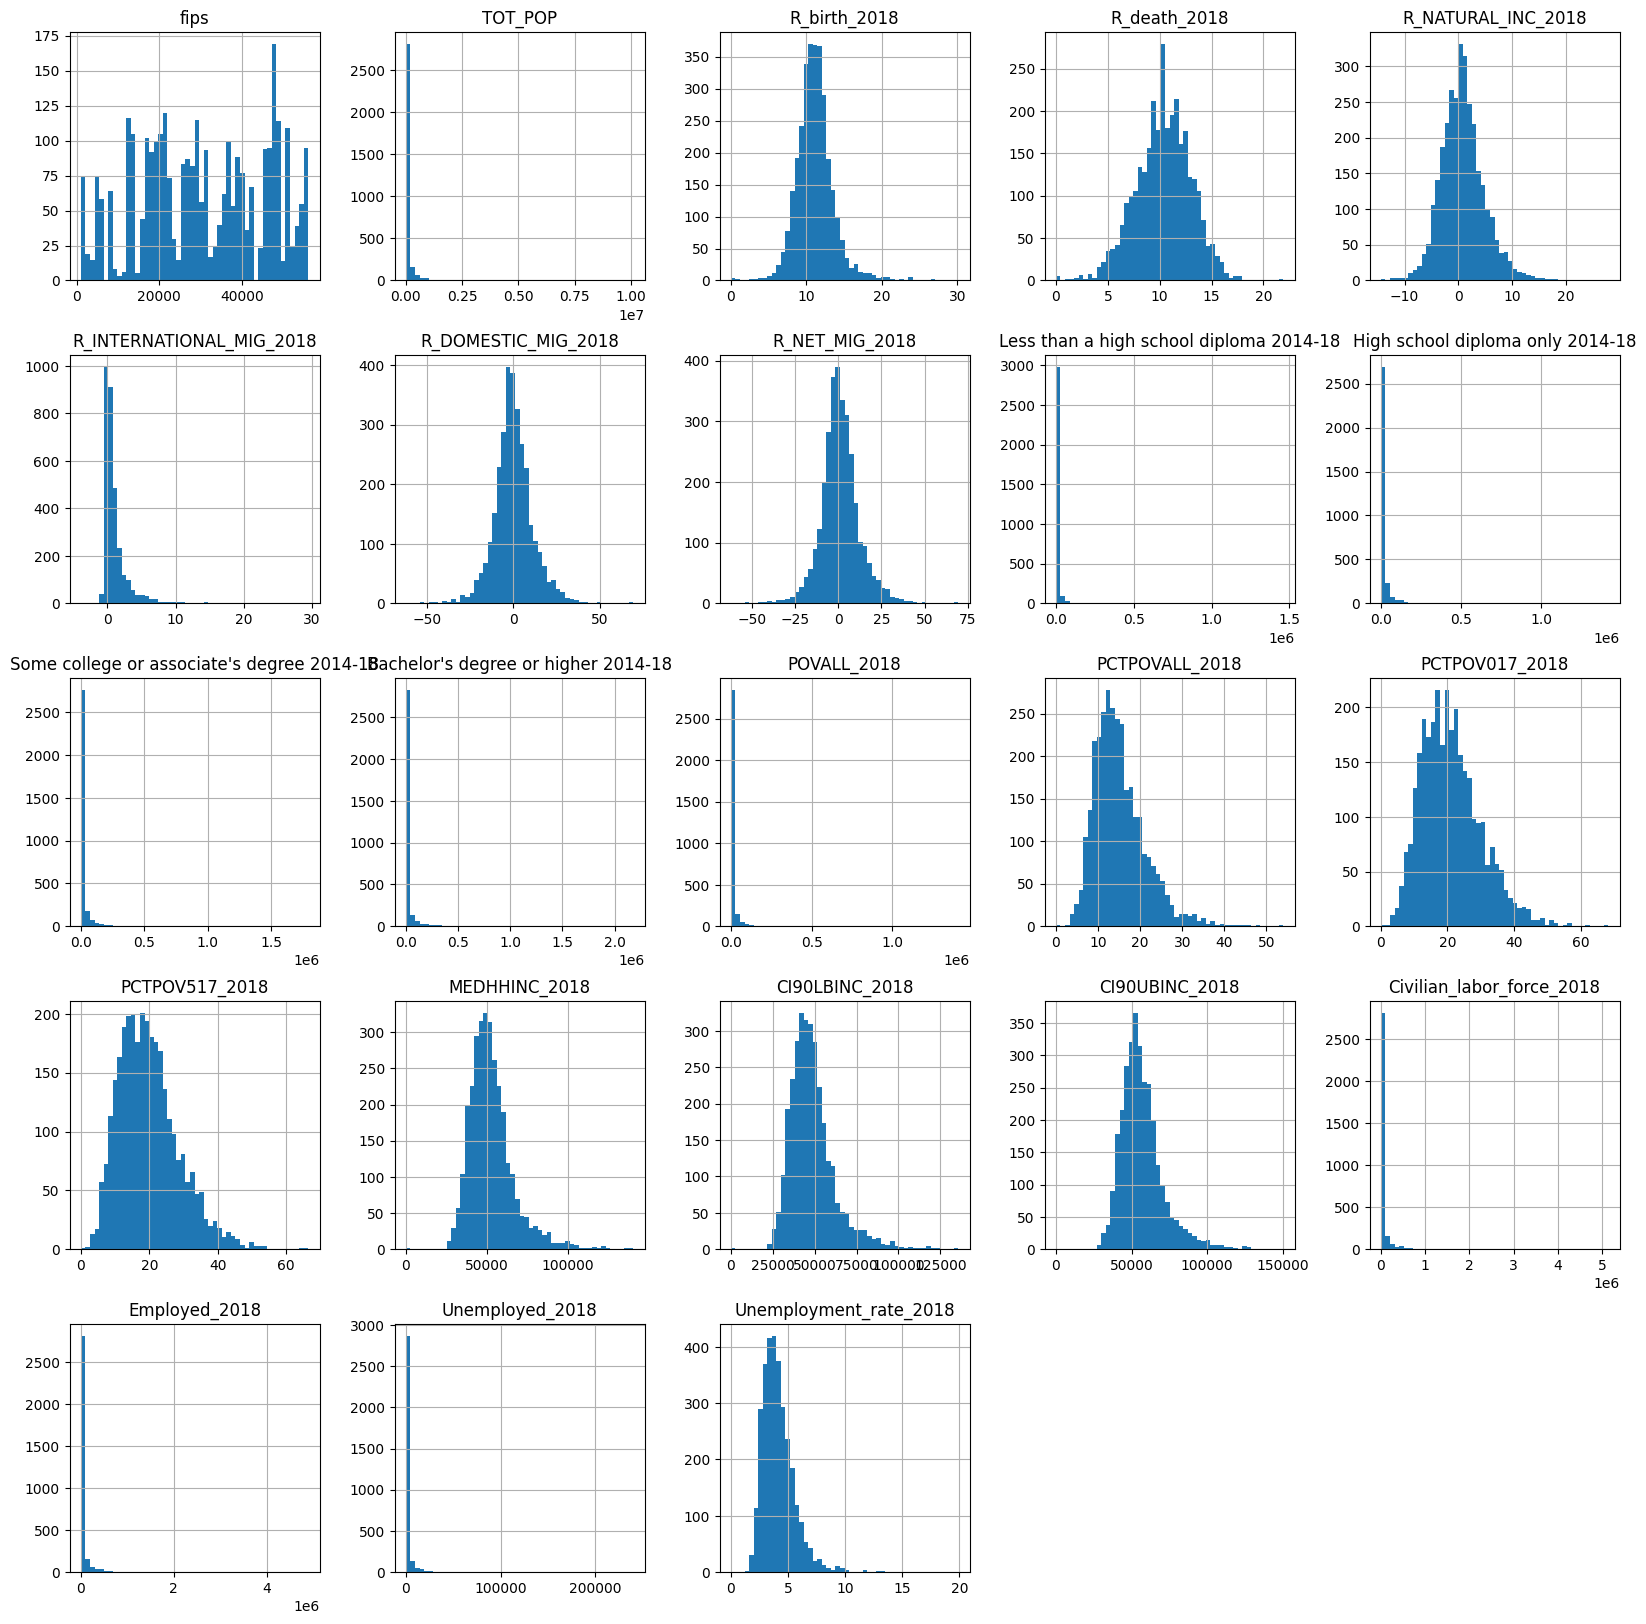

In [16]:
# Visualize the histograms of the columns
sociodemographic.hist(figsize=(20, 20), bins=50)